In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
!source sh/setup40.sh && echo $CUDA_HOME

Autoloading gmp/6.2.1/gcc-7.5.0-2px2tki
Autoloading mpc/1.1.0/gcc-7.5.0-osodvlz
Autoloading mpfr/4.1.0/gcc-7.5.0-ublhnmp
Autoloading zlib/1.2.11/gcc-7.5.0-h3xiplk
Autoloading zstd/1.5.0/gcc-7.5.0-qsdxtru
Autoloading cuda/10.2.89/gcc-7.5.0-jr6kobf
Autoloading libxml2/2.9.9/gcc-7.5.0-ouvtc2l
Autoloading libiconv/1.16/gcc-7.5.0-pndwbk6
Autoloading xz/5.2.4/gcc-7.5.0-55h4brm
Autoloading zlib/1.2.11/gcc-7.5.0-dsnnbcq
Autoloading libxml2/2.9.12/gcc-7.5.0-i2j2pf5
Autoloading libiconv/1.16/gcc-7.5.0-cvte7wx
Autoloading xz/5.2.5/gcc-7.5.0-sytpwnz
Autoloading zlib/1.2.11/gcc-7.5.0-h3xiplk
>/sw/workstations/apps/linux-ubuntu18.04-ivybridge/cuda/11.5.0/gcc-7.5.0/syen6pj6ss3cw66zlj4wkfhtixh5i4ei


In [6]:
from grids import load_and_grid

In [ ]:
!source ./sh/setup40.sh

In [13]:
# !module purge
!module load cudnn
g_path = "training-runs/SS750/00010-stylegan3-r-LR-gpus4-batch32-gamma2/network-snapshot-000000.pkl"
load_and_grid(g_path, grid_size=4, random_state=19, full_size=4096, save_name="q00000w", ext=".jpg", folder="output", verbose=True, force_MN=False)

Autoloading cuda/10.2.89/gcc-7.5.0-jr6kobf
Autoloading libxml2/2.9.9/gcc-7.5.0-ouvtc2l
Autoloading libiconv/1.16/gcc-7.5.0-pndwbk6
Autoloading xz/5.2.4/gcc-7.5.0-55h4brm
Autoloading zlib/1.2.11/gcc-7.5.0-dsnnbcq
>

Generating images 1k:   0%|          | 0/16 [00:00<?, ?it/s]

Setting up PyTorch plugin "bias_act_plugin"... 

Generating images 1k:   0%|          | 0/16 [00:00<?, ?it/s]

Failed!


ImportError: /home/cvejica/.cache/torch_extensions/py38_cu113/bias_act_plugin/3cb576a0039689487cfba59279dd6d46-nvidia-a100-pcie-40gb/bias_act_plugin.so: cannot open shared object file: No such file or directory

In [16]:
from legacy import load_network_pkl
gpath = "pretrained/stylegan3-r-ffhq-1024x1024.pkl" # pretrained/stylegan3-t-ffhq-1024x1024.pkl
with open(gpath, 'rb') as f:
    Gr = load_network_pkl(f)['G_ema']
from legacy import load_network_pkl
gtpath = "pretrained/stylegan3-t-ffhq-1024x1024.pkl" # pretrained/stylegan3-t-ffhq-1024x1024.pkl
with open(gtpath, 'rb') as f:
    G = load_network_pkl(f)['G_ema']

In [17]:
G._init_kwargs

{'z_dim': 512,
 'w_dim': 512,
 'channel_base': 32768,
 'channel_max': 512,
 'mapping_kwargs': {},
 'conv_kernel': 3,
 'filter_size': 6,
 'magnitude_ema_beta': 0.9988915792636801,
 'output_scale': 0.25,
 'c_dim': 0,
 'img_resolution': 1024,
 'img_channels': 3,
 'use_radial_filters': False}

In [15]:
Gr._init_kwargs

{'z_dim': 512,
 'w_dim': 512,
 'channel_base': 65536,
 'channel_max': 1024,
 'mapping_kwargs': {},
 'conv_kernel': 1,
 'filter_size': 6,
 'magnitude_ema_beta': 0.9988915792636801,
 'output_scale': 0.25,
 'c_dim': 0,
 'img_resolution': 1024,
 'img_channels': 3,
 'use_radial_filters': True}

In [2]:
from util import patch_util

In [3]:
ps = patch_util.PatchSampler(1024, True, True, max_scale=1)

In [ ]:
from PIL import Image
random_pil_image = Image.open("/datawaha/cggroup/cvejica/SS750/HR/shutterstock_2935644_01.png")

# for i in range(1000):
#     img, d = ps.sample_patch(random_pil_image)
#     if d['sampled_scale'] != 0.25:
#         print(d['sampled_scale'])

In [15]:
test = patch_util.generate_full_from_patches(4096, 1024)

In [4]:
test = patch_util.generate_full_from_patches(4096, 1024)

In [18]:
from util.patch_util import construct_transformation_matrix
def test_generate_full_from_patches(new_size=4096, patch_size=1024):
    # returns the bounding boxes and transformations needed to 
    # piece together patches of size patch_size into a 
    # full image of size new_size
    patch_params = []
    for y in range(0, new_size, patch_size):
        for x in range(0, new_size, patch_size):
            if y + patch_size > new_size:
                y = new_size - patch_size
            if x + patch_size > new_size:
                x = new_size - patch_size
            limits = [(y/(new_size)*2-1, (y+patch_size) /(new_size)*2-1),
              (x/(new_size)*2-1, (x+patch_size) /(new_size)*2-1)]
            #transform = construct_transformation_matrix(limits)
            #patch_params.append(((y, y+patch_size, x, x+patch_size), transform))
            patch_params.append(limits)
    return patch_params
q = test_generate_full_from_patches()

In [22]:
new_size, patch_size = 4096, 1024
points = []
for y in range(0, new_size, patch_size):
        for x in range(0, new_size, patch_size):
            points.append((y, x)) 
            print(y, x)

0 0
0 1024
0 2048
0 3072
1024 0
1024 1024
1024 2048
1024 3072
2048 0
2048 1024
2048 2048
2048 3072
3072 0
3072 1024
3072 2048
3072 3072


### 4 Image Example

In [220]:
from PIL import Image

import einops
from torchvision.transforms import ToTensor, ToPILImage
import torch

img_size  = 64

list_of_images_names = ['yellow', 'green', 'blue', 'red', 'brown', 'azure', 'orange', 'violet', 'white', 'black', 'gray', 'silver', 'gold', 'indigo', 'pink', 'purple']
list_of_images = [ToTensor()(Image.new('RGB', (img_size, img_size), color = c)) for c in list_of_images_names]

# purple_image = ToTensor()(Image.new('RGB', (img_size, img_size), color = 'purple'))
# pink_image = ToTensor()(Image.new('RGB', (img_size, img_size), color = 'pink'))
# list_of_images[4] = purple_image
# list_of_images[5] = pink_image

In [ ]:
import torch
# torch.nn.functional.interpolate

In [40]:
import numpy as np
SUB_PIXEL = 1
tx = np.linspace(-2*SUB_PIXEL, 2*SUB_PIXEL, 4).reshape(1,4).repeat(4, axis=0)
ty = np.linspace(-2*SUB_PIXEL, 2*SUB_PIXEL, 4).reshape(4,1).repeat(4, axis=1)


In [41]:
ty

array([[-2.        , -2.        , -2.        , -2.        ],
       [-0.66666667, -0.66666667, -0.66666667, -0.66666667],
       [ 0.66666667,  0.66666667,  0.66666667,  0.66666667],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

In [39]:
values

array([[-2.        , -0.66666667,  0.66666667,  2.        ],
       [-2.        , -0.66666667,  0.66666667,  2.        ],
       [-2.        , -0.66666667,  0.66666667,  2.        ],
       [-2.        , -0.66666667,  0.66666667,  2.        ]])

In [5]:
from gen_videos import create_patch_info_split
create_patch_info_split()

([((0, 1024, 0, 1024),
   tensor([[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]])),
  ((0, 1024, 0, 1024),
   tensor([[1.0000e+00, 0.0000e+00, 3.2552e-04],
           [0.0000e+00, 1.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 1.0000e+00]])),
  ((0, 1024, 0, 1024),
   tensor([[1.0000e+00, 0.0000e+00, 6.5104e-04],
           [0.0000e+00, 1.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 1.0000e+00]])),
  ((0, 1024, 0, 1024),
   tensor([[1.0000e+00, 0.0000e+00, 9.7656e-04],
           [0.0000e+00, 1.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 1.0000e+00]])),
  ((0, 1024, 0, 1024),
   tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00],
           [0.0000e+00, 1.0000e+00, 3.2552e-04],
           [0.0000e+00, 0.0000e+00, 1.0000e+00]])),
  ((0, 1024, 0, 1024),
   tensor([[1.0000e+00, 0.0000e+00, 3.2552e-04],
           [0.0000e+00, 1.0000e+00, 3.2552e-04],
           [0.0000e+00, 0.0000e+00, 1.0000e+00]])),
  ((0, 1024, 0, 1024),
   tensor([

In [30]:
SUB_PIXEL = 1
PIXEL_LEN = 1.0 #1/1024
import numpy as np 
import torch


tx = torch.tensor([[0, PIXEL_LEN], [0, PIXEL_LEN]]).unsqueeze(0).unsqueeze(0)
ty = torch.tensor([[0, 0], [PIXEL_LEN, PIXEL_LEN]]).unsqueeze(0).unsqueeze(0)
tx_matrix = torch.nn.functional.interpolate(tx, size=4, mode='bilinear', align_corners=True).squeeze(0).squeeze(0).numpy()
print(f"tx_matrix\n{tx_matrix}")
ty_matrix = torch.nn.functional.interpolate(ty, size=4, mode='bilinear', align_corners=True).squeeze(0).squeeze(0).numpy()
print(f"ty_matrix\n{ty_matrix}")

tx_matrix
[[0.         0.33333334 0.6666667  1.        ]
 [0.         0.3333333  0.6666666  1.        ]
 [0.         0.33333334 0.6666667  1.        ]
 [0.         0.33333334 0.6666667  1.        ]]
ty_matrix
[[0.         0.         0.         0.        ]
 [0.33333334 0.3333333  0.33333334 0.33333334]
 [0.6666667  0.6666666  0.6666667  0.6666667 ]
 [1.         1.         1.         1.        ]]


In [10]:
import numpy as np
from gen_videos import create_patch_info_split
w, tx, ty = create_patch_info_split(PIXEL_LEN=1)

In [11]:
tx

tensor([[0.0000, 0.2500, 0.5000, 0.7500],
        [0.0000, 0.2500, 0.5000, 0.7500],
        [0.0000, 0.2500, 0.5000, 0.7500],
        [0.0000, 0.2500, 0.5000, 0.7500]])

In [16]:
print(f"ty:\n{ty}")

ty:
tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500],
        [0.5000, 0.5000, 0.5000, 0.5000],
        [0.7500, 0.7500, 0.7500, 0.7500]])


torch.Size([16, 64, 64, 3])
torch.Size([256, 256, 3])


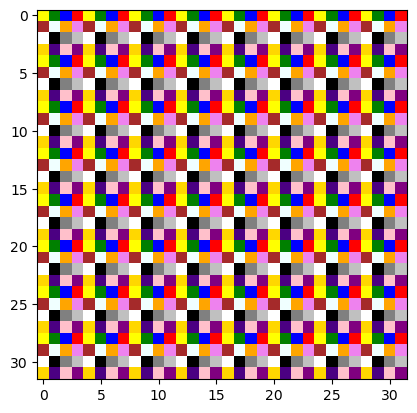

In [233]:
stacked = torch.stack(list_of_images, dim=0).permute(0, 2, 3, 1)
print(stacked.shape)
w = einops.rearrange(stacked, '(b1 b2) (h1 h2) (w1 w2) c -> (h1 b1 h2) (w1 b2 w2) c', h1=img_size, w1=img_size, b2=4, c=3)
print(w.shape)
# display w
img = ToPILImage()(w.permute(2, 0, 1))
#save 
img.save("test.png")

# Display only first quarter of the image, with labels for each color, as to which is it in the list order
from matplotlib import pyplot as plt
img_cut = img.crop((0, 0, 32, 32))

# 

im = plt.imshow(img_cut)
colors = [ im.cmap(im.norm(value)) for value in values]
plt.show()
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.imshow(img_cut, interpolation='none')
# #ax.legend([f"{c}={i}" for i, c in enumerate(list_of_images_names)]) # , loc='upper left', bbox_to_anchor=(1, 1)
# ax.text(60, 5, "\n".join([f"{c}={i}" for i, c in enumerate(list_of_images_names)]), fontsize=12, color='white')
# plt.show()
# # add legend to plt





In [184]:
combined_image = einops.rearrange(list_of_images, "b c h w -> b h w c", h=1024, w=1024)
print(combined_image.shape)

torch.Size([16, 1024, 1024, 3])


In [187]:
combined_image2 = einops.rearrange(combined_image, "b h w c -> (b h w) c", b=16, h=1024, w=1024)
combined_image2.shape

torch.Size([16777216, 3])

In [237]:
patches = patch_util.generate_full_from_patches(output_resolution, G_base.img_resolution)

In [240]:
patches[0][0]

(0, 1024, 0, 1024)

In [241]:
patches[0][1]

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [248]:
SUB_PIXEL = 0.25/(1024*4)
list(np.arange(-2*SUB_PIXEL, 2*SUB_PIXEL, SUB_PIXEL))

[-0.0001220703125, -6.103515625e-05, 0.0, 6.103515625e-05]

In [ ]:
SUB_PIXEL = 0.25/(1024*4)
list(np.arange(-8*SUB_PIXEL, 8*SUB_PIXEL, SUB_PIXEL))

In [1]:
!module load cudnn

Autoloading cuda/10.2.89/gcc-7.5.0-jr6kobf
Autoloading libxml2/2.9.9/gcc-7.5.0-ouvtc2l
Autoloading libiconv/1.16/gcc-7.5.0-pndwbk6
Autoloading xz/5.2.4/gcc-7.5.0-55h4brm
Autoloading zlib/1.2.11/gcc-7.5.0-dsnnbcq
>

In [2]:

# def generate_different_images_split(selected, ws_list, G_base, output_resolution=4096, output_format="jpg", grid=4, extra:str="p000000/"):
from gen_videos import generate_different_images_split, load_G, load_ws
G_base, ws_list = load_G(), load_ws()
#generate_different_images_split(list(range(len(ws_list))), ws_list, G_base, output_resolution=4096, output_format="png", grid=4, extra="p000000/", mov_scale=0.25, num_pixels=1024)
generate_different_images_split(list(range(len(ws_list))), ws_list, G_base, output_resolution=4096, output_format="png", grid=4, extra="p000000/", mov_scale=1, num_pixels=1024)

Saving to outputs/p000000/g4_m1_n1024


Generating different images:   0%|          | 0/16 [00:00<?, ?it/s]

Setting up PyTorch plugin "filtered_lrelu_plugin"... 

Failed!


OSError: CUDA_HOME environment variable is not set. Please set it to your CUDA install root.

In [1]:
from gen_videos import create_patch_info_split
qqq = create_patch_info_split(SUB_PIXEL=1)

In [2]:
w = [(q[1][0][2].item(), q[1][1][2].item()) for q in qqq]

In [3]:
print(f"tx matrix:")
for i in range(0, 16):
    if i % 4 == 0:
        print()
    print(f"{w[i][0]:5f} ", end='')
print(f'\nty matrix:')
for i in range(0, 16):
    if i % 4 == 0:
        print()
    print(f"{w[i][1]:5f} ", end='')

tx matrix:

-2.000000 -0.666667 0.666667 2.000000 
-2.000000 -0.666667 0.666667 2.000000 
-2.000000 -0.666667 0.666667 2.000000 
-2.000000 -0.666667 0.666667 2.000000 
ty matrix:

-2.000000 -2.000000 -2.000000 -2.000000 
-0.666667 -0.666667 -0.666667 -0.666667 
0.666667 0.666667 0.666667 0.666667 
2.000000 2.000000 2.000000 2.000000 

In [136]:
final_images = torch.cat([torch.cat(list_of_images[i:i+4], dim=2) for i in range(0,16,4)], dim=1)

### Random previous tests

In [ ]:
# load one image example
from PIL import Image
random_pil_image = Image.open("/datawaha/cggroup/cvejica/SS750/LR/shutterstock_2935644_01.png")
import torch
from torchvision.transforms import ToTensor, ToPILImage
full_size = 4096
full = torch.zeros([1, 3, full_size, full_size])
import matplotlib.pyplot as plt

plt.imshow(ToPILImage()(full[0]))
# set the image to part of the image
full[:, :, 0:1024, 0:1024] = ToTensor()(random_pil_image).unsqueeze(0).float()


In [43]:
from training.networks_stylegan3 import Generator
import pickle
G_path = "training-runs/SS750/00010-stylegan3-r-LR-gpus4-batch32-gamma2/network-snapshot-000000.pkl"
with open(G_path, 'rb') as f:
        G_base: Generator = pickle.load(f)['G_ema'].cuda()
with open(f'ws.pkl', 'rb') as f:
        ws_list = pickle.load(f)

In [130]:
from util import patch_util
#patches = patch_util.generate_full_from_patches(full_size, G_base.img_resolution)
patches = patch_util.generate_full_from_patches(full_size, G_base.img_resolution)
from util import renormalize
from typing import List
from tqdm import tqdm
def test_create_random_grid_4k(G_base, patches, ws_list:List[torch.Tensor], grid_size:int = 4, random_state:int = 19, full_size:int = 4096, fs:int = None, verbose:bool = False) -> List[torch.Tensor]:
    items = []
    for i in tqdm(range(grid_size*grid_size), desc='Generating images 4k', disable=not verbose):        
        full = torch.zeros([1, 3, full_size, full_size])
        
        for bbox, transform in patches:
            #G_base.scale_mapping_kwargs = None
            if fs is not None:
                # change [0, 0] and [1, 1] indexes new scale, instead of 0.25
                transform[0, 0] = fs
                transform[1, 1] = fs
            img = patch_util.scale_condition_wrapper(G_base, ws_list[i], transform[None].cuda(), noise_mode='const', force_fp32=True)
            full[:, :, bbox[0]:bbox[1], bbox[2]:bbox[3]] = img
        img = renormalize.as_tensor(full[0], target='pt')
        #items.append(img)
    return img
rez = test_create_random_grid_4k(G_base, patches[:8], ws_list, grid_size=1, random_state=19, full_size=4096, fs=None, verbose=True)
plt.imshow(ToPILImage()(rez[0]))
# # patches[0][1][0][0] = 0.25 # sx
# # patches[0][1][1][1] = 0.25 # sy
# # patches[0][1][0][2] = -0.75 # tx
# # patches[0][1][1][2] = -0.75 # ty

# # replace last 8 patches matrixes (element 1 and also element 0) with first 1, with different tx and ty based on list_tx_ty
# # make a list of tx and ty, starting from -0.5, increment of 0.1
# list_tx_ty = []
# for i in range(8):
#     list_tx_ty.append((-0.5 + 0.1*i, -0.5 + 0.1*i))
# print(list_tx_ty)
# n = len(patches)
# mid = n//2
# for i in range(8):
#     #el = list(patches[i]) # convert 
#     #el[0] = patches[i][0]
#     #patches[mid+i] = el
#     patches[mid+i][1][0][2] = list_tx_ty[i][0]
#     patches[mid+i][1][1][2] = list_tx_ty[i][1]

# # set scale to 1 for all patches
# for i in range(n):
#     patches[i][1][0][0] = 1
#     patches[i][1][1][1] = 1

# print(patches[0])

In [153]:
# from util import patch_util
# patches = patch_util.generate_full_from_patches(full_size, G_base.img_resolution)

### 4 image translation

### Refactored video translation code into a function that takes a video file as input and returns a video file as output.

In [92]:
import copy
import numpy as np
from torchvision.transforms import ToPILImage, ToTensor
import matplotlib.pyplot as plt
import os
import torch

from util import renormalize
from typing import List
from tqdm import tqdm
def test_create_random_grid_4k(G_base, patches, ws_list:List[torch.Tensor], grid_size:int = 4, random_state:int = 19, full_size:int = 4096, fs:int = None, verbose:bool = False) -> List[torch.Tensor]:
    items = []
    for i in tqdm(range(grid_size*grid_size), desc='Generating images 4k', disable=not verbose):        
        full = torch.zeros([1, 3, full_size, full_size])
        
        for bbox, transform in patches:
            #G_base.scale_mapping_kwargs = None
            if fs is not None:
                # change [0, 0] and [1, 1] indexes new scale, instead of 0.25
                transform[0, 0] = fs
                transform[1, 1] = fs
            img = patch_util.scale_condition_wrapper(G_base, ws_list[i], transform[None].cuda(), noise_mode='const', force_fp32=True)
            full[:, :, bbox[0]:bbox[1], bbox[2]:bbox[3]] = img
        img = renormalize.as_tensor(full[0], target='pt')
        items.append(img)
    return items
    
def create_patch_info(shift_start, shift_stop, scale_start, scale_stop, n):
    import numpy as np # Two
    values = list(np.linspace(start=shift_start, stop=shift_stop, num=n))    
    list_scale = list(np.linspace(start=scale_start, stop=scale_stop, num=n))   

    # actually construct the lists
    list_tx_ty = []
    for v in values:
        list_tx_ty.append((v, v))

    scales = []
    for w in list_scale:
        scales.append((w, w))

    return list_tx_ty, scales

def create_patches(patch, list_tx_ty, scales):
    patches = []
    patches.append(copy.deepcopy(patch))
    for i in range(len(list_tx_ty)):
        cp = copy.deepcopy(patch)
        cp[1][0][2] = list_tx_ty[i][0]
        cp[1][1][2] = list_tx_ty[i][1]
        # set scales
        cp[1][0][0] = scales[i][0]
        cp[1][1][1] = scales[i][1]

        patches.append(cp)
    patches.append(copy.deepcopy(patch))
    return patches
from PIL import ImageFont, ImageDraw

from grids import create_random_grid_4k

def generate_frames(G, patches, ws, write_text_on_images:bool = False):
    frames = []
    for i in range(len(patches)):
        #frame = G_base.synthesis(patches[i], noise_mode='const')
        #frame = (frame + 1) / 2
        frame = create_random_grid_4k(G, [ws], [patches[i]], grid_size=1, random_state=19, full_size=1024, fs=None, verbose=False)
        
        if write_text_on_images:
            frame = ToPILImage()(frame[0])
            draw = ImageDraw.Draw(frame)
            draw.text((0, 0), f"Frame {i}", fill=(255, 255, 255))
            frame = ToTensor()(frame)
        frames.append(frame)
    return frames

import torchvision
import imageio
def write_frames_to_file(frames, path, format:str):
    fpath = path[:path.rfind('/')]
    if not os.path.exists(fpath):
        os.makedirs(fpath)
    if not (format == 'jpg' or format == 'png' or format == 'mp4' or format == 'gif'):
        print(f"Unknown format {format}")
        return
    #print(f"Saving {len(frames)} frames to {path} as {format} files")
    
    if format == 'jpg' or format == 'png':
        for i in range(len(frames)):
            torchvision.utils.save_image(frames[i], f"{path}{i}.{format}")
    elif format == 'mp4':
        with imageio.v2.get_writer(f"{path}.{format}", fps=1, format='FFMPEG', mode='I') as w: # outputs{extra_path}{fname}result_{sel}.mp4
            for im in frames:
                # if tensor, convert to PIL 
                if isinstance(im, torch.Tensor):
                    im = ToPILImage()(im)
                w.append_data(np.array(im))
    elif format == 'gif':
        imageio.mimsave(f"{path}.gif", frames, fps=1)

In [93]:
from util import patch_util
from tqdm import tqdm

import einops

from training.networks_stylegan3 import Generator
import pickle

def load_G(G_path:str = 'training-runs/SS750/00010-stylegan3-r-LR-gpus4-batch32-gamma2/network-snapshot-000000.pkl'):
    with open(G_path, 'rb') as f:
        G_base: Generator = pickle.load(f)['G_ema'].cuda()
    return G_base

def load_ws(ws_path:str = 'ws.pkl'):
    with open(ws_path, 'rb') as f:
        ws_list = pickle.load(f)
    return ws_list

def generate_different_images(selected, ws_list, G_base, output_resolution=1024, output_format="mp4", shift_start=-0.5, shift_stop=0.5, scale_start=0.5, scale_stop=1.5, n=8, extra:str="r000000/"):
    patches = patch_util.generate_full_from_patches(output_resolution, G_base.img_resolution)
    folder_location = f"outputs/{extra}s{shift_start}_s{shift_stop}_sc{scale_start}_sc{scale_stop}_n{n}"
    print(f"Saving to {folder_location}")
    for i in tqdm(selected, desc="Generating different images", leave=False):
        # output includes generator steps, 
        output_folder_and_file = f"{folder_location}/result_{i}"
        list_tx_ty, scales = create_patch_info(shift_start, shift_stop, scale_start, scale_stop, n)
        patches = create_patches(patches[0], list_tx_ty, scales)
        frames = generate_frames(G_base, patches, ws_list[i], write_text_on_images=True)
        write_frames_to_file(frames, output_folder_and_file, output_format)

G_base, ws_list = load_G(), load_ws()

In [8]:
from gen_videos import create_patch_info
t1, t2 = create_patch_info(0, 0, 1, 1, 1)

In [10]:
t2

[(1.0, 1.0)]

In [8]:
!module load cudnn
from gen_videos import generate_different_images, load_G, load_ws
G_base, ws_list = load_G(), load_ws()
generate_different_images(list(range(len(ws_list))), ws_list, G_base, output_resolution=1024, output_format="png", shift_start=0, shift_stop=0, scale_start=1, scale_stop=1, n=1, extra="p000000/", write_text_on_images=False)

Autoloading cuda/10.2.89/gcc-7.5.0-jr6kobf
Autoloading libxml2/2.9.9/gcc-7.5.0-ouvtc2l
Autoloading libiconv/1.16/gcc-7.5.0-pndwbk6
Autoloading xz/5.2.4/gcc-7.5.0-55h4brm
Autoloading zlib/1.2.11/gcc-7.5.0-dsnnbcq
>Saving to outputs/p000000/s0_s0_sc1_sc1_n1 and adding_extra_patches=False


In [94]:
!module load cudnn
generate_different_images(list(range(len(ws_list))), ws_list, G_base, output_resolution=1024, output_format="mp4", shift_start=-0.25, shift_stop=0.25, scale_start=1, scale_stop=1, n=8, extra="r000000/")

5788.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Autoloading cuda/10.2.89/gcc-7.5.0-jr6kobf
Autoloading libxml2/2.9.9/gcc-7.5.0-ouvtc2l
Autoloading libiconv/1.16/gcc-7.5.0-pndwbk6
Autoloading xz/5.2.4/gcc-7.5.0-55h4brm
Autoloading zlib/1.2.11/gcc-7.5.0-dsnnbcq
>Saving to outputs/r000000/s-0.25_s0.25_sc1_sc1_n16


Generating different images:  94%|█████████▍| 15/16 [00:38<00:02,  2.57s/it][rawvideo @ 0x6e1b6c0] Stream #0: not enough frames to estimate rate; consider increasing probesize


#### Generate images of shifted or scaled generator outputs

In [203]:
from training.networks_stylegan3 import Generator
import pickle
G_path = "training-runs/SS750/00010-stylegan3-r-LR-gpus4-batch32-gamma2/network-snapshot-000000.pkl"
with open(G_path, 'rb') as f:
        G_base: Generator = pickle.load(f)['G_ema'].cuda()
with open(f'ws.pkl', 'rb') as f:
        ws_list = pickle.load(f)


patch = patch_util.generate_full_from_patches(1024, G_base.img_resolution)
import copy

patches = []
list_tx_ty = []
scales = []

use_zero_shift = False
use_one_scale = False
shift_start = -0.5
shift_stop = 0.5

scale_start = 0.25
scale_stop = 0.25
n = 48

if use_zero_shift:
    shift_start, shift_stop = 0, 0
if use_one_scale:
    scale_start, scale_stop = 1, 1

import numpy as np # Two
values = list(np.linspace(start=shift_start, stop=shift_stop, num=n))    
list_scale = list(np.linspace(start=scale_start, stop=scale_stop, num=n))   #list_tx_ty.append((-1 + 0.1*i, -0.5 + 0.1*i))  

# actually construct the lists
for v in values:
    list_tx_ty.append((v, v))

for w in list_scale:
    scales.append((w, w))

patches.append(patch[0])

for i in range(n):
    cp = copy.deepcopy(patch[0])
    cp[1][0][2] = list_tx_ty[i][0]
    cp[1][1][2] = list_tx_ty[i][1]
    # set scales
    cp[1][0][0] = scales[i][0]
    cp[1][1][1] = scales[i][1]

    patches.append(cp)

patches.append(patch[0])
extra_path = f"/s{scale_start}_{scale_stop}_n{n}_shift{shift_start}_{shift_stop}/"

In [204]:
fname = '' #'s_' #'eps_'
import os
selected = list(range(len(ws_list)))

myFont = ImageFont.truetype('FreeMono.ttf', 20)
for sel in selected:
    frames = []
    for i in range(len(patches)):
        rez = test_create_random_grid_4k(G_base, [patches[i]], [ws_list[sel]], grid_size=1, random_state=19, full_size=1024, fs=None, verbose=False)
        img  = ToPILImage()(rez)
        I1 = ImageDraw.Draw(img)
        I1.text((10, 10), f"sx {patches[i][1][0][0]} sy {patches[i][1][1][1]} tx {patches[i][1][0][2]} ty {patches[i][1][1][2]}", font=myFont, fill=(255, 255, 255))
        frames.append(img)

    import imageio
    #imageio.mimsave("result.gif", frames, duration=1) # , 'GIF'
    import numpy as np

    if not os.path.exists(f'outputs{extra_path}'):
        os.makedirs(f'outputs{extra_path}')

    with imageio.v2.get_writer(f'outputs{extra_path}{fname}result_{sel}.mp4', fps=1, format='FFMPEG', mode='I') as w:
        for im in frames:
            w.append_data(np.array(im))
# w.close()

[rawvideo @ 0x5eea6c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x744e6c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x6b946c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x6cc36c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x6aad6c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x5aa86c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x60696c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x6f8d6c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x6e836c0] Stream #0: not enough frames to estimate rate; consider increasing probesize
[rawvideo @ 0x6f376c0] Stream #0: not enough frames to estimate rate; consider increasing probesize


<video width="400" height="400" controls>
  <source src="outputs/result.mp4" type="video/mp4">
</video>

Generating images 4k: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


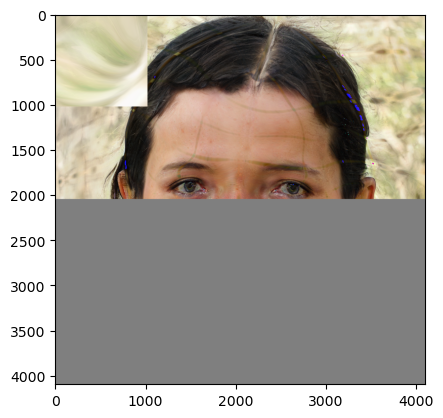

In [87]:
rez = test_create_random_grid_4k(G_base, patches[:8], ws_list, grid_size=1, random_state=19, full_size=4096, fs=None, verbose=True)
plt.imshow(ToPILImage()(rez[0]))

In [21]:
import numpy as np
np.linspace(-1, 1, 4)

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [19]:
q

[[(-1.0, -0.5), (-1.0, -0.5)],
 [(-1.0, -0.5), (-0.5, 0.0)],
 [(-1.0, -0.5), (0.0, 0.5)],
 [(-1.0, -0.5), (0.5, 1.0)],
 [(-0.5, 0.0), (-1.0, -0.5)],
 [(-0.5, 0.0), (-0.5, 0.0)],
 [(-0.5, 0.0), (0.0, 0.5)],
 [(-0.5, 0.0), (0.5, 1.0)],
 [(0.0, 0.5), (-1.0, -0.5)],
 [(0.0, 0.5), (-0.5, 0.0)],
 [(0.0, 0.5), (0.0, 0.5)],
 [(0.0, 0.5), (0.5, 1.0)],
 [(0.5, 1.0), (-1.0, -0.5)],
 [(0.5, 1.0), (-0.5, 0.0)],
 [(0.5, 1.0), (0.0, 0.5)],
 [(0.5, 1.0), (0.5, 1.0)]]

In [7]:
for bbox, t in test:
    print(bbox, t[None] == t)
    break

(0, 1024, 0, 1024) tensor([[[True, True, True],
         [True, True, True],
         [True, True, True]]])


In [89]:
-0.3750 + 0.1250 

-0.25

In [16]:
test

[((0, 1024, 0, 1024),
  tensor([[ 0.2500,  0.0000, -0.3750],
          [ 0.0000,  0.2500, -0.3750],
          [ 0.0000,  0.0000,  1.0000]])),
 ((0, 1024, 1024, 2048),
  tensor([[ 0.2500,  0.0000, -0.1250],
          [ 0.0000,  0.2500, -0.3750],
          [ 0.0000,  0.0000,  1.0000]])),
 ((0, 1024, 2048, 3072),
  tensor([[ 0.2500,  0.0000,  0.1250],
          [ 0.0000,  0.2500, -0.3750],
          [ 0.0000,  0.0000,  1.0000]])),
 ((0, 1024, 3072, 4096),
  tensor([[ 0.2500,  0.0000,  0.3750],
          [ 0.0000,  0.2500, -0.3750],
          [ 0.0000,  0.0000,  1.0000]])),
 ((1024, 2048, 0, 1024),
  tensor([[ 0.2500,  0.0000, -0.3750],
          [ 0.0000,  0.2500, -0.1250],
          [ 0.0000,  0.0000,  1.0000]])),
 ((1024, 2048, 1024, 2048),
  tensor([[ 0.2500,  0.0000, -0.1250],
          [ 0.0000,  0.2500, -0.1250],
          [ 0.0000,  0.0000,  1.0000]])),
 ((1024, 2048, 2048, 3072),
  tensor([[ 0.2500,  0.0000,  0.1250],
          [ 0.0000,  0.2500, -0.1250],
          [ 0.0000,  0.0

In [14]:
ps.sample_patch(random_pil_image)


(<PIL.Image.Image image mode=RGB size=1024x1024>,
 {'min_scale_absolute': 0.25,
  'min_scale_anneal': 0.25,
  'sampled_scale': 0.3603410537826012,
  'limits': [(-0.18156228008444752, 0.5390570021111893),
   (-0.7748064743138635, -0.054187192118226646)],
  'x': 320,
  'y': 1163,
  'new_size': 2842,
  'orig_size': 4096,
  'transform': tensor([[ 0.3603,  0.0000, -0.2072],
          [ 0.0000,  0.3603,  0.0894],
          [ 0.0000,  0.0000,  1.0000]])})